In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine, MetaData, Table,select,func

In [88]:
#Data Preparation:
survey=pd.read_excel('./US Superstore data.xls')

In [89]:
survey.head()
survey.shape
survey.info()
survey.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [90]:
survey_copy=survey.copy()

In [91]:
#check for duplicate
print(survey_copy.duplicated().sum())
#there is no duplicated rows

0


In [92]:
#check for missing values
missing_count=survey_copy.isnull().sum()
print(missing_count)
#there is no missing value

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


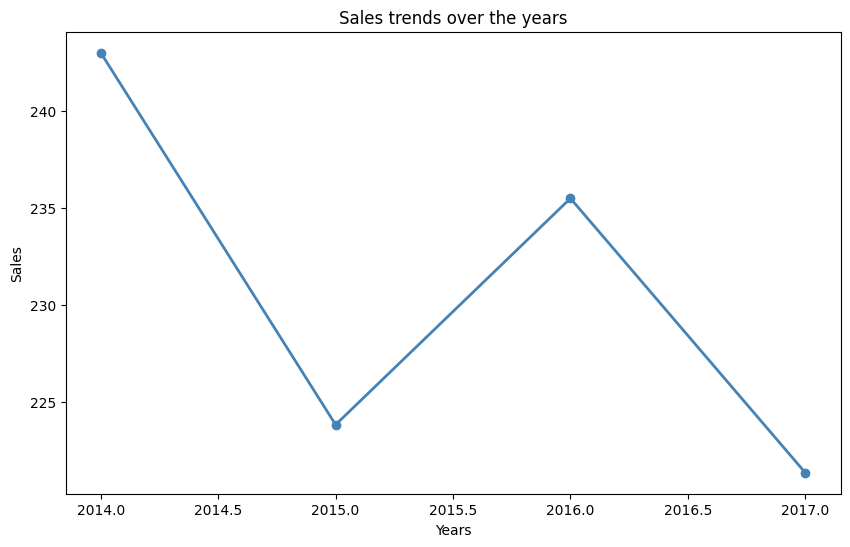

In [93]:
#Data Visualization with Matplotlib
#Create an interactive line chart to show sales trends over the years.

survey_copy['Years'] = survey_copy['Order Date'].dt.year
survey_copy['Average_sales']=survey_copy['Sales'].mean()
nvPd=survey_copy.groupby('Years')['Sales'].mean()
plt.figure(figsize=(10, 6))
plt.plot(nvPd.index, nvPd.values, marker='o', linewidth=2, color='steelblue')
plt.title("Sales trends over the years")
plt.ylabel("Sales")
plt.xlabel("Years")
plt.show()

- Sales declined from 2014 to 2017  with a brief recovery in 2016


In [94]:
survey_copy['Country'].unique()

array(['United States'], dtype=object)

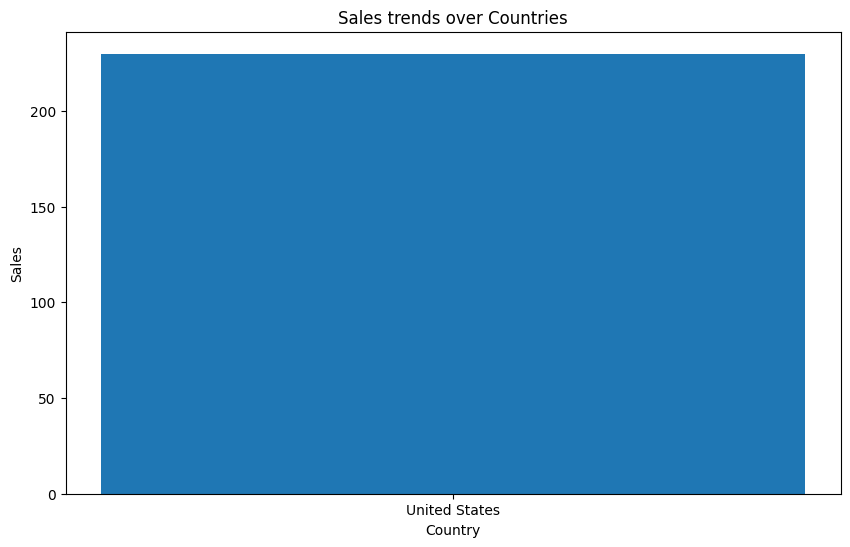

In [95]:
#Build an interactive map to visualize sales distribution by country.
saleByContry=survey_copy.groupby('Country')['Sales'].mean()

plt.figure(figsize=(10, 6))
plt.bar(saleByContry.index, saleByContry.values)

plt.title("Sales trends over Countries")
plt.ylabel("Sales")
plt.xlabel("Country")
plt.show()

- All sales data comes from the United States only


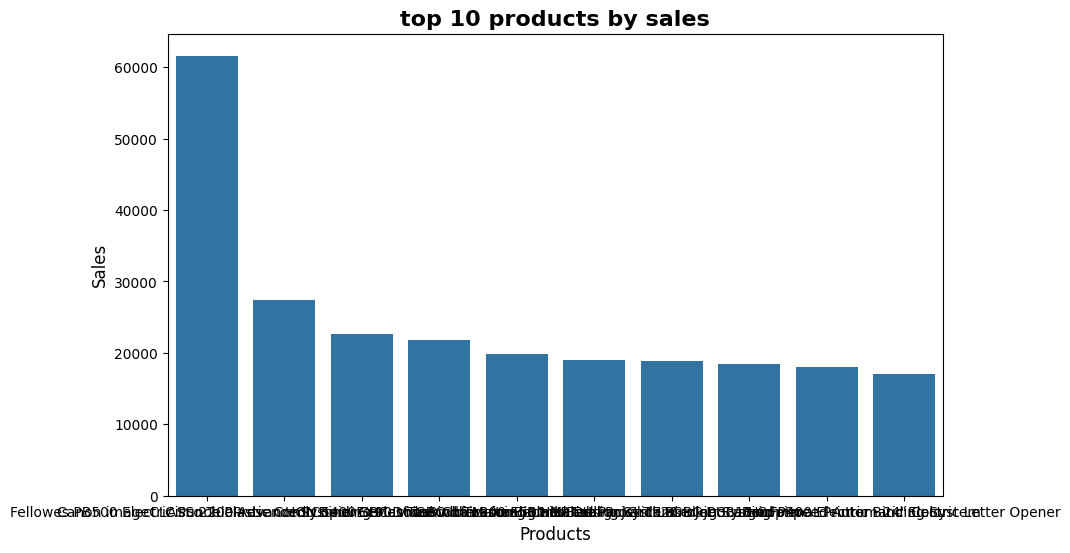

In [96]:
#Data Visualization with Seaborn:
#Use Seaborn to generate a bar chart showing top 10 products by sales.
sales_by_product = survey_copy.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
Top10=sales_by_product.head(10)
plt.figure(figsize=(10, 6))

sns.barplot(x=Top10.index, y=Top10.values)

plt.title('top 10 products by sales', fontsize=16, fontweight='bold')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


Canon imageCLASS 2200 Advanced Copier dominates with ~62K in sales (2x more than 2nd place)

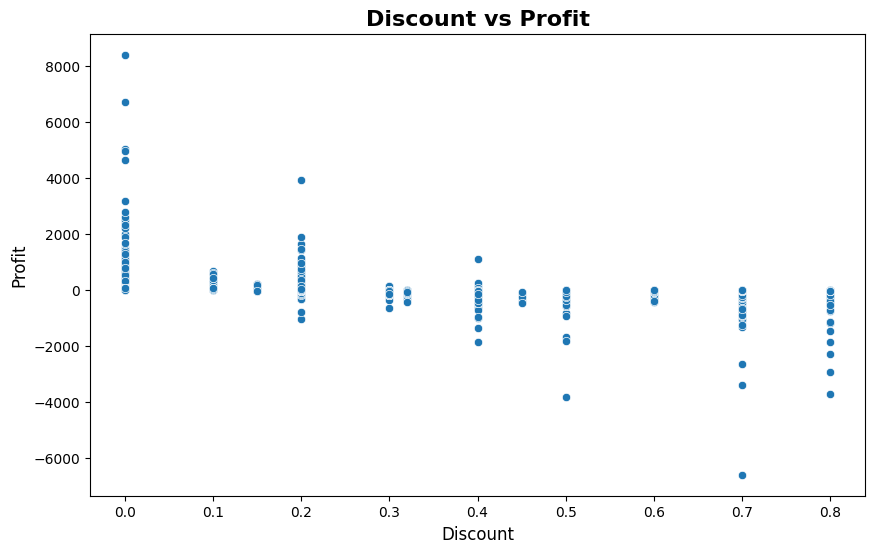

In [97]:
#Create a scatter plot to analyze the relationship between profit and discount.
plt.figure(figsize=(10, 6))

sns.scatterplot(data=survey_copy, x='Discount', y='Profit')
plt.title("Discount vs Profit", fontsize=16, fontweight='bold')
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.show()

Strong negative correlation between discount and profit: discounts >40% often result in losses
Key finding: High discounts are severely impacting profitability